<h1><b><u> Machine Learning Coursework: Asaph Kalala </u></b></h1> 

I worked and submitted alone on this coursework.

<h2><u><b> Introduction </b></u></h2>

 This Jypyter notebook is about energy efficiency prediction. I will be analysing a dataset consisting of different building shapes with different characteristics, and the objective will be to predict the heating load of the building. The dataset contains 9 features and an outcome variable which needs to be predicted. The analysis will include data inspection and visualisation, data preprocessing, data transformations, treatment of missing values, feature selection and will implement various regression models. I will tune the models using the training set and select the best performing two models which will then be evaluated on the test set. 



In [236]:

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np 
import pandas as pd 
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('datcw_na.csv')

#Returns description of the data in the DataFrame and distributions of variables
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y
count,768.000000,768.000000,728.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.763516,666.768997,321.102527,176.564141,5.229766,3.527331,0.237852,2.803737,22.307201
std,0.147093,120.863329,60.479340,51.280618,1.844813,1.245710,0.139736,1.597817,10.090196
min,0.500000,416.740000,198.450000,89.310000,2.840000,1.620000,0.000000,0.000000,6.010000
25%,0.650000,575.510000,277.830000,132.300000,3.470000,2.427500,0.100000,1.517500,12.992500
50%,0.750000,661.500000,315.320000,178.235000,4.955000,3.600000,0.240000,2.970000,18.950000
75%,0.860000,741.130000,355.740000,218.300000,6.930000,4.425000,0.360000,3.960000,31.667500
max,1.190000,978.290000,503.970000,266.800000,8.470000,6.050000,0.480000,6.050000,43.100000


In [59]:
#Shows first 5 records in csv file
data.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,Y
0,C3,1.19,622.55,NaN,89.31,7.00,1.98,0.0,0.0,15.55
1,C1,1.19,622.55,323.40,109.15,7.70,3.00,0.0,0.0,15.55
2,C1,0.88,463.05,291.06,99.23,5.67,4.40,0.0,0.0,15.55
3,C2,0.79,509.36,291.06,121.28,6.30,4.05,0.0,0.0,15.55
4,C1,0.89,507.15,385.39,121.28,7.70,2.00,0.0,0.0,20.84


In [60]:
#Shows what data tpye of the columns 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X0      768 non-null    object 
 1   X1      768 non-null    float64
 2   X2      768 non-null    float64
 3   X3      728 non-null    float64
 4   X4      768 non-null    float64
 5   X5      768 non-null    float64
 6   X6      768 non-null    float64
 7   X7      768 non-null    float64
 8   X8      768 non-null    float64
 9   Y       768 non-null    float64
dtypes: float64(9), object(1)
memory usage: 60.1+ KB


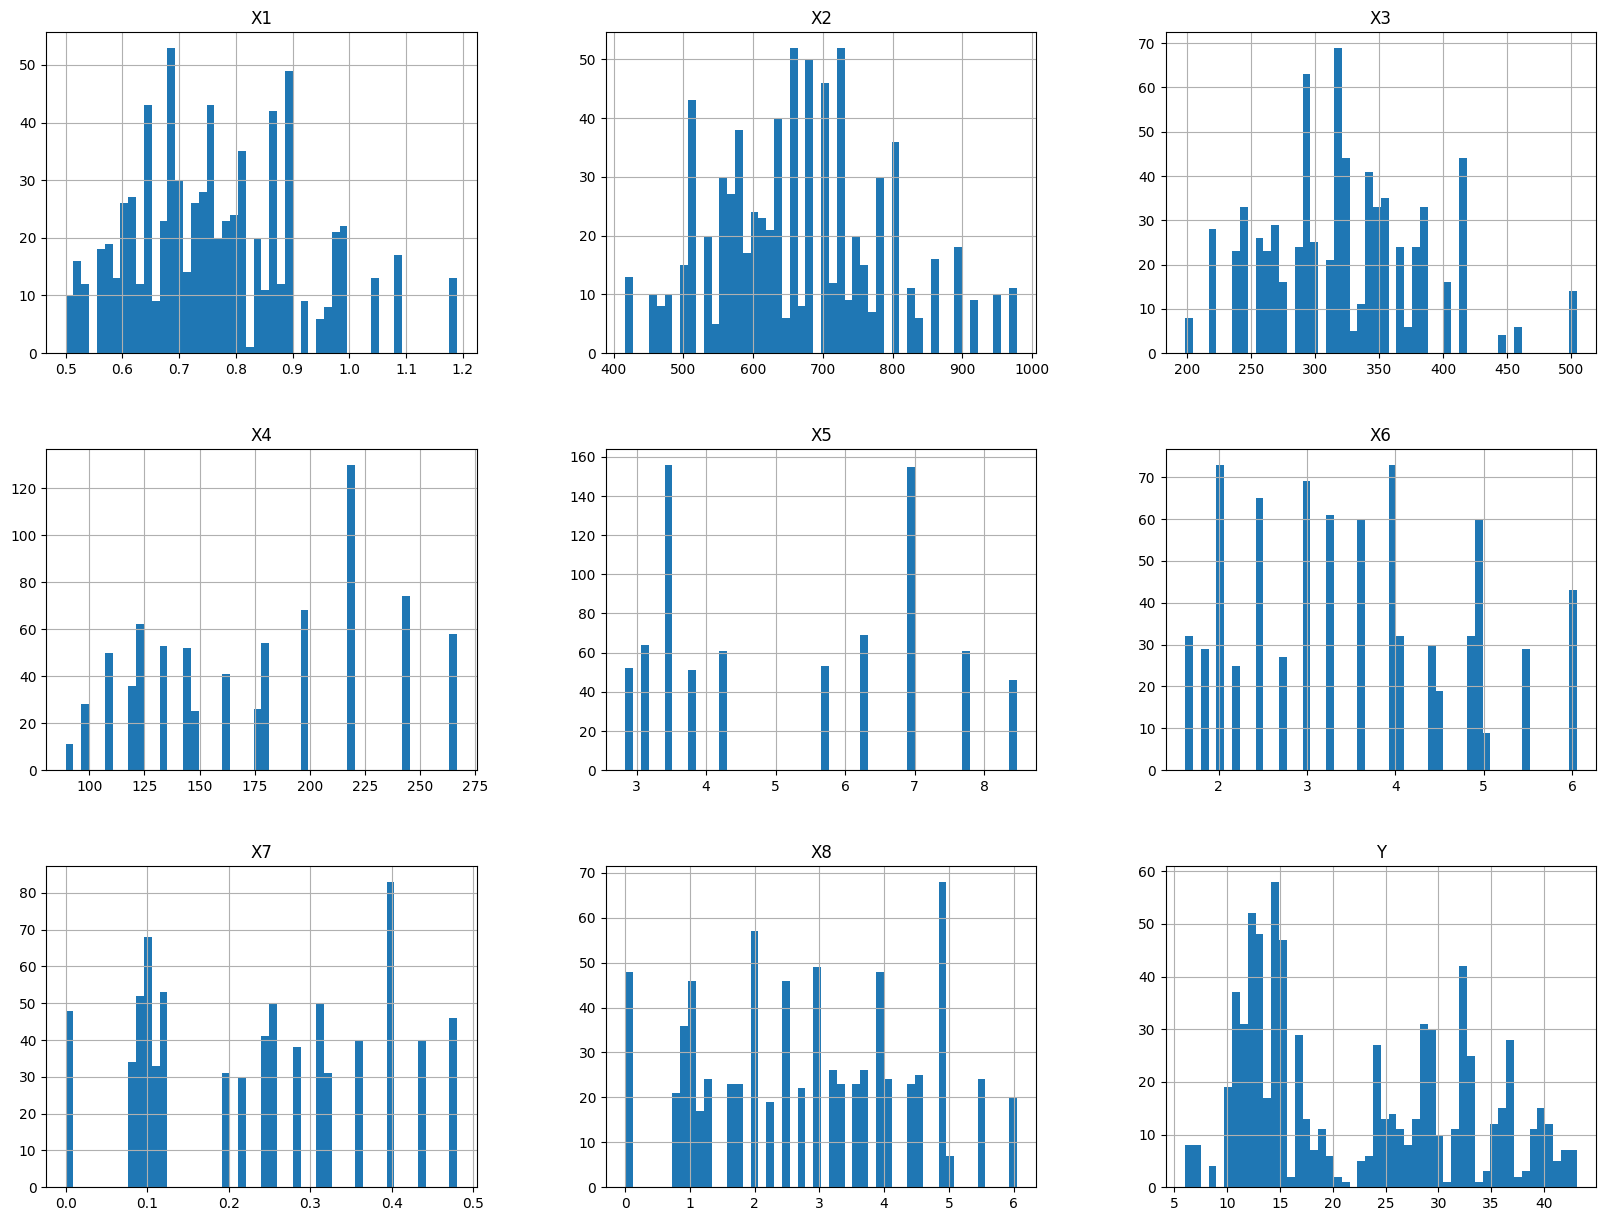

In [62]:
# Plots histograms
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
# Shows the correlations of the specific heat capcity ("Y") to other variables
corr_matrix = data.corr()
corr_matrix["Y"].sort_values(ascending=False)

C:\Users\asaph\AppData\Local\Temp\ipykernel_11800\4057528716.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


Y     1.000000
X5    0.815769
X1    0.454177
X3    0.312449
X7    0.255901
X8    0.087106
X6    0.001340
X2   -0.481192
X4   -0.771040
Name: Y, dtype: float64

In [ ]:
# To make this notebook's output identical at every run
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.3, random_state=42)

In [ ]:
data = train_set.drop("Y", axis=1) # drop labels for training set
data_labels = train_set["Y"].copy()

In [ ]:
# Shows all records with Null values. 
nan_in_col  = data[data["X3"].isna()]
nan_in_col 


,X0,X1,X2,X3,X4,X5,X6,X7,X8,Y
0,C3,1.19,622.55,NaN,89.31,7.00,1.98,0.00,0.00,15.55
34,C1,0.68,661.50,NaN,178.60,3.47,4.40,0.00,0.00,6.77
88,C2,0.64,776.16,NaN,242.55,3.85,1.80,0.10,1.10,15.41
121,C3,0.73,617.40,NaN,218.30,3.47,2.43,0.09,2.00,10.46
168,C1,0.67,754.60,NaN,242.55,3.47,1.98,0.11,2.43,10.39
224,C3,0.68,661.50,NaN,198.45,2.84,1.80,0.12,4.40,11.18
278,C2,0.53,919.00,NaN,218.30,3.85,3.96,0.10,5.50,11.22
282,C2,0.70,705.60,NaN,242.55,3.47,3.96,0.11,4.95,15.12
296,C3,0.85,582.12,NaN,161.70,6.30,1.98,0.28,1.10,29.54
313,C1,0.74,679.14,NaN,242.55,3.15,3.30,0.24,0.90,12.50


In [ ]:

# compute median and impute the missing values.
# constant value and hence have a varince to impact the prediction of the model.

median = data["X3"].median()
data["X3"].fillna(median, inplace=True)

In [ ]:
# Checks to see if null values have been replaced 
nan_in_col2  = data[data["X3"].isna()]
nan_in_col2

,X0,X1,X2,X3,X4,X5,X6,X7,X8


In [ ]:
# In future data where there are missing values the inputer allows us to fill missing values on some of these variables 
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [ ]:
# Median can only be calculated on numerical attributes so we drop the "X0" column 
data_num = data.drop("X0", axis=1)

In [ ]:
imputer.fit(data_num)

SimpleImputer(strategy='median')

In [ ]:
# Shows the medians computed by the imputer.
imputer.statistics_

array([7.5000e-01, 6.6150e+02, 3.1532e+02, 1.7860e+02, 4.2400e+00,
       3.6000e+00, 2.5000e-01, 2.9700e+00])

In [ ]:
#Comparing the median values to see if they are the same.
data_num.median().values

array([7.5000e-01, 6.6150e+02, 3.1532e+02, 1.7860e+02, 4.2400e+00,
       3.6000e+00, 2.5000e-01, 2.9700e+00])

In [ ]:
X = imputer.transform(data_num)

In [ ]:
data_tr = pd.DataFrame(X, columns=data_num.columns, 
                          index=data.index) # Creates a DataFrame with the transformed data

In [ ]:
data_tr.loc[data.index.values] # Shows the transformed data

,X1,X2,X3,X4,X5,X6,X7,X8
334,0.61,800.42,363.82,242.55,2.84,3.96,0.24,0.99
139,0.63,705.60,339.57,198.45,3.85,6.05,0.10,1.98
485,0.99,557.86,315.32,110.25,6.30,3.30,0.28,5.00
547,0.71,630.63,339.57,119.07,7.70,6.05,0.36,0.99
18,0.71,630.63,377.30,119.07,5.67,3.60,0.00,0.00
...,...,...,...,...,...,...,...,...
71,0.75,654.89,416.50,121.28,8.47,4.05,0.09,0.90
106,1.04,582.12,291.06,161.70,7.70,3.96,0.09,2.42
270,0.86,575.51,326.10,242.55,3.47,4.84,0.12,6.05
435,0.97,509.36,355.74,109.15,6.93,6.05,0.31,3.24


In [ ]:
data_tr = pd.DataFrame(X, columns=data_num.columns,
                          index=data_num.index)

In [ ]:
# Makes a duplicate of the "X0" column that is categoric 
data_cat = data[["X0"]]
data_cat.head(10)

,X0
334,C3
139,C3
485,C2
547,C1
18,C2
593,C1
140,C1
326,C2
266,C2
626,C1


In [ ]:
data_tr.head() # numerical data

,X1,X2,X3,X4,X5,X6,X7,X8
334,0.61,800.42,363.82,242.55,2.84,3.96,0.24,0.99
139,0.63,705.60,339.57,198.45,3.85,6.05,0.10,1.98
485,0.99,557.86,315.32,110.25,6.30,3.30,0.28,5.00
547,0.71,630.63,339.57,119.07,7.70,6.05,0.36,0.99
18,0.71,630.63,377.30,119.07,5.67,3.60,0.00,0.00


In [ ]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder() 
data_cat_1hot = cat_encoder.fit_transform(data_cat) # Returns a sparse matrix
data_cat_1hot 

<537x3 sparse matrix of type '<class 'numpy.float64'>'
	with 537 stored elements in Compressed Sparse Row format>

In [ ]:
#Shows the types of categories 
cat_encoder.categories_

[array(['C1', 'C2', 'C3'], dtype=object)]

In [ ]:
data_cat_1hot.toarray()

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [ ]:
# Pipeline to preprocess the numerical attributes
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])
data_num_tr = num_pipeline.fit_transform(data_num)

In [ ]:
data_num_tr

array([[-1.03443078,  1.07099616,  0.74848195, ...,  0.35749091,
         0.00490148, -1.16327892],
       [-0.89814782,  0.29534228,  0.33497246, ...,  2.08630327,
        -0.99102645, -0.54348139],
       [ 1.55494538, -0.91321187, -0.07853703, ..., -0.18844984,
         0.28945232,  1.34721409],
       ...,
       [ 0.66910617, -0.76882997,  0.10528286, ...,  1.0854119 ,
        -0.84875103,  2.00457511],
       [ 1.41866242, -1.30995531,  0.61070229, ...,  2.08630327,
         0.50286545,  0.24535182],
       [ 1.55494538, -0.91321187, -1.05629515, ...,  0.35749091,
        -1.13330187, -0.40574861]])

In [ ]:
from sklearn.compose import ColumnTransformer
num_attribs = list(data_num)
cat_attribs = ["X0"]
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])
data_prepared = full_pipeline.fit_transform(data)

In [ ]:
data_prepared

array([[-1.03443078,  1.07099616,  0.74848195, ...,  0.        ,
         0.        ,  1.        ],
       [-0.89814782,  0.29534228,  0.33497246, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.55494538, -0.91321187, -0.07853703, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.66910617, -0.76882997,  0.10528286, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.41866242, -1.30995531,  0.61070229, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.55494538, -0.91321187, -1.05629515, ...,  0.        ,
         0.        ,  1.        ]])

<h2><b><u>Ridge regression</u></b></h2>

The Ridge regression algorithm is a linear model that is used to predict a continuous target variable. It is a regularised version of the linear regression algorithm. It is a good algorithm to use when there are a large number of input variables and you suspect that only a subset of the input variables are actually useful.

In [ ]:
# Fitting a ridge regression to predict the heating load values
from sklearn.linear_model import Ridge
ridge_reg = Ridge(random_state=42)
ridge_reg.fit(data_prepared, data_labels)

Ridge(random_state=42)

In [ ]:
# Prediction of Ridge Regression on training set

print("Predictions:", ridge_reg.predict(data_prepared))

Predictions: [12.44088179 14.65502958 30.12802667 34.92687323 23.55007985 29.21015686
 11.72893264 15.70813932  8.0237792  35.84302848  8.34151319 27.7774464
 29.73659565 35.97653244 11.84006891 15.82064787 30.74244169 19.46067039
 33.33633179 15.7676296  12.85755962 30.80363365 34.44724428 21.32910916
  9.40820792 26.77012467 18.58513164 21.78954732 19.37168682 13.31063822
 14.7510244  16.12068912 12.78973048 12.01548392 32.41356135 27.34245658
 30.79664324  7.62814784 30.06395252 33.55473379 32.50711398 25.42080638
 12.45465335 11.9211613  10.24492721 12.40910031 12.80006273 18.31125527
 19.14935951 14.00336303 11.13942034 27.96691593 11.78390997  9.88685811
 29.67683965 35.18628996 16.4993156  18.03143307  9.23477795 19.77169881
 11.88360737  9.28797801 36.67065873 30.21461792 26.33808972 20.99815796
 24.50480795 23.67907056 18.2291001  27.58939461 27.35908897 14.00393398
  7.9905365  31.6859562  34.99354883 30.51156104 36.3955965  15.87756986
 25.49948107 27.8283884  25.60330497  4

In [ ]:
#Comparison to the exsiting values 
print("Labels:", list(data_labels))

Labels: [15.08, 15.19, 32.31, 41.67, 29.63, 43.1, 12.88, 13.17, 10.34, 32.23, 11.16, 24.03, 31.28, 29.92, 6.4, 15.16, 40.42, 14.6, 36.43, 14.34, 11.53, 32.13, 36.57, 12.91, 10.72, 29.4, 16.48, 19.48, 16.74, 12.41, 14.21, 11.22, 13.99, 15.12, 36.7, 27.03, 32.15, 10.36, 33.28, 42.08, 26.48, 36.97, 12.63, 12.96, 14.34, 15.2, 12.46, 14.61, 19.13, 14.71, 11.64, 18.31, 10.56, 10.77, 33.24, 32.74, 18.48, 14.66, 11.1, 14.62, 12.78, 11.16, 36.47, 31.29, 36.71, 19.2, 29.47, 15.98, 14.61, 37.03, 31.63, 12.35, 12.49, 25.43, 29.49, 32.33, 36.45, 16.66, 19.95, 26.45, 24.77, 10.68, 14.16, 12.42, 14.12, 16.83, 39.32, 27.03, 35.69, 12.97, 12.87, 15.09, 16.76, 12.59, 15.16, 17.15, 12.29, 26.47, 10.39, 12.74, 11.34, 32.96, 40.11, 12.68, 13.69, 12.85, 15.41, 13.94, 32.4, 10.72, 32.12, 28.15, 13.0, 15.55, 15.16, 12.85, 32.85, 28.15, 11.22, 14.18, 33.16, 11.44, 42.62, 14.32, 37.24, 11.11, 12.57, 32.49, 24.28, 14.65, 40.57, 14.37, 15.3, 10.78, 14.22, 39.04, 36.91, 12.97, 8.45, 25.98, 12.95, 41.92, 33.21, 24.

In [ ]:
# RMSE error on the Ridge Regression in relation to the training set
from sklearn.metrics import mean_squared_error
data_predictions2 = ridge_reg.predict(data_prepared) # Predictions
lin_mse2 = mean_squared_error(data_labels, data_predictions2) 
lin_rmse2 = np.sqrt(lin_mse2)
lin_rmse2

4.522611698211332

In [ ]:
ridge_reg.get_params() # Shows the parameters of the ridge regression

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'positive': False,
 'random_state': 42,
 'solver': 'auto',
 'tol': 0.0001}

In [ ]:
from sklearn.model_selection import GridSearchCV #GridSearchCV is used to find the best parameters for the model 
parameters={'alpha':[0.001, 0.01, 0.1,1,5,10]} #The parameters that are being tested 
ridge_regressor=GridSearchCV(ridge_reg,parameters,scoring='neg_mean_squared_error',cv=5) #The model that is being tested
ridge_regressor.fit(data_prepared,data_labels)

GridSearchCV(cv=5, estimator=Ridge(random_state=42),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 5, 10]},
             scoring='neg_mean_squared_error')

In [ ]:
#Shows the best possible parameters 
ridge_regressor.best_params_

{'alpha': 5}

In [ ]:
ridge_regressor.best_estimator_

Ridge(alpha=5, random_state=23)

In [ ]:
# Cross validation results in full as a dataframe
pd.DataFrame(ridge_regressor.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.037599,0.057607,0.004998,0.006230,0.001,{'alpha': 0.001},-19.026522,-23.145076,-21.837626,-24.059301,-18.729382,-21.359581,2.147842,6
1,0.002402,0.001500,0.002200,0.002040,0.01,{'alpha': 0.01},-19.026440,-23.145423,-21.837554,-24.058915,-18.729366,-21.359539,2.147821,5
2,0.005201,0.003546,0.001800,0.000751,0.1,{'alpha': 0.1},-19.025624,-23.148888,-21.836835,-24.055058,-18.729211,-21.359123,2.147612,4
3,0.074401,0.145305,0.002005,0.002541,1,{'alpha': 1},-19.017877,-23.183543,-21.830148,-24.017169,-18.727887,-21.355325,2.145709,3
4,0.003410,0.002873,0.002192,0.002028,5,{'alpha': 5},-18.991884,-23.337567,-21.810623,-23.862836,-18.726730,-21.345928,2.140987,1
5,0.004607,0.004027,0.000798,0.000399,10,{'alpha': 10},-18.976497,-23.529858,-21.806966,-23.698847,-18.734635,-21.349360,2.142490,2


In [ ]:
# Evaluating my optimised system on the test set

final_model = ridge_regressor.best_estimator_

X_test = test_set.drop("Y", axis=1)
y_test = test_set["Y"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [ ]:
# Comparison of RMSE before and after optimisation 

print("RMSE before optimisation:",lin_rmse2)
print("Final RMSE after optimisation:",final_rmse) 

RMSE before optimisation: 4.522611698211332
Final RMSE after optimisation: 4.384157959836937


<h2><b><u>Polynomial regression</u></b></h2>

Polynomial regression is a form of regression analysis in which the relationship between the independent variable x and the dependent variable y is modelled as an nth degree polynomial in x. Polynomial regression fits a nonlinear relationship between the value of x and the corresponding conditional mean of y, denoted E(y|x). Polynomial regression is a special case of the general linear regression model.

In [96]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

X_train = data[['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]
y = data['Y']


In [97]:
poly_features = PolynomialFeatures(degree=2, include_bias=False) # degree of polynomial features


In [98]:
X_poly = poly_features.fit_transform(X) # transforms the existing features to higher degree features.


In [99]:
X[0] # original features


array([6.1000e-01, 8.0042e+02, 3.6382e+02, 2.4255e+02, 2.8400e+00,
       3.9600e+00, 2.4000e-01, 9.9000e-01])

In [100]:
X_poly[0] # The first feature is the constant term, the second is the first feature, the third is the second feature, and so on.

array([6.10000000e-01, 8.00420000e+02, 3.63820000e+02, 2.42550000e+02,
       2.84000000e+00, 3.96000000e+00, 2.40000000e-01, 9.90000000e-01,
       3.72100000e-01, 4.88256200e+02, 2.21930200e+02, 1.47955500e+02,
       1.73240000e+00, 2.41560000e+00, 1.46400000e-01, 6.03900000e-01,
       6.40672176e+05, 2.91208804e+05, 1.94141871e+05, 2.27319280e+03,
       3.16966320e+03, 1.92100800e+02, 7.92415800e+02, 1.32364992e+05,
       8.82445410e+04, 1.03324880e+03, 1.44072720e+03, 8.73168000e+01,
       3.60181800e+02, 5.88305025e+04, 6.88842000e+02, 9.60498000e+02,
       5.82120000e+01, 2.40124500e+02, 8.06560000e+00, 1.12464000e+01,
       6.81600000e-01, 2.81160000e+00, 1.56816000e+01, 9.50400000e-01,
       3.92040000e+00, 5.76000000e-02, 2.37600000e-01, 9.80100000e-01])

In [101]:
y = y[:537] # The target variable is the same length as the number of rows in the data

In [110]:
lin_reg = LinearRegression() # Create a linear regression object
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_


(-25.39470454090145,
 array([ 1.08348921e+02, -1.83596104e-03,  5.26589855e-02,  1.73574728e-01,
         2.51731336e+00, -1.05919231e+01, -4.97958288e+01,  2.20158176e+00,
        -2.67600014e+01, -3.09659693e-02, -6.23044049e-02, -1.38095083e-01,
        -2.62280631e-01, -4.27639841e-01, -5.66328574e+00,  5.22055507e-01,
         8.78656950e-05, -1.86311940e-04, -2.57541102e-04,  1.66497166e-03,
         4.55413467e-04,  4.13471702e-02, -2.96305124e-03,  1.97148476e-04,
        -1.54677522e-04, -5.50523346e-03,  6.07825538e-03, -4.86152827e-02,
         3.41124676e-03,  2.36449058e-04, -4.59823612e-03,  1.99720883e-02,
         7.83167326e-02, -1.87235740e-03, -2.00230231e-01,  5.06591847e-01,
         2.99929463e+00, -3.56524105e-01,  3.15296116e-01, -1.37250973e+00,
         2.56647562e-01,  4.36801990e+01, -1.75603130e+00, -3.21588994e-03]))

In [120]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3) # 30% test set
    train_errors, val_errors = [], []                  # empty lists
    for m in range(1, len(X_train)):                 # 1, 2, ..., len(X_train) - 1 
        model.fit(X_train[:m], y_train[:m])                   # train the model on the first m instances 
        y_train_predict = model.predict(X_train[:m])            # predict the first m instances
        y_val_predict = model.predict(X_val)                   # predict the validation set
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict)) # compute the training error
        val_errors.append(mean_squared_error(y_val, y_val_predict)) # compute the validation error
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train") # plot the training error
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val") # plot the validation error




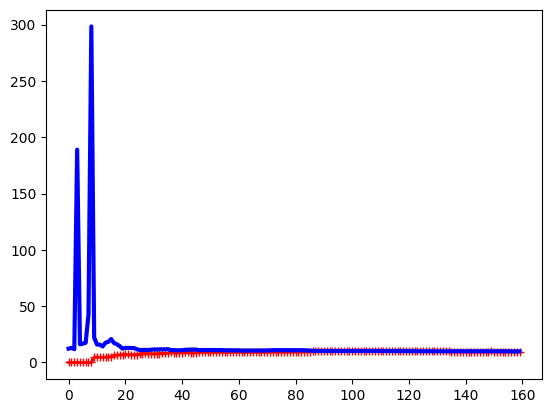

In [119]:
lin_reg = LinearRegression() # create a linear regression model
plot_learning_curves(lin_reg, X, y)


In [238]:
print("RMSE before optimisation:",X) # RMSE before optimisation
print("Final RMSE after optimisation:",final_rmse)  # RMSE after optimisation

RMSE before optimisation:      X0    X1      X2      X3    X5    X6    X7    X8      Y
0    C3  1.19  622.55     NaN  7.00  1.98  0.00  0.00  15.55
1    C1  1.19  622.55  323.40  7.70  3.00  0.00  0.00  15.55
2    C1  0.88  463.05  291.06  5.67  4.40  0.00  0.00  15.55
3    C2  0.79  509.36  291.06  6.30  4.05  0.00  0.00  15.55
4    C1  0.89  507.15  385.39  7.70  2.00  0.00  0.00  20.84
..   ..   ...     ...     ...   ...   ...   ...   ...    ...
763  C3  0.52  948.64  277.83  4.24  4.95  0.48  4.05  17.88
764  C2  0.50  727.65     NaN  3.47  1.98  0.44  5.00  16.54
765  C1  0.68  889.35  404.25  3.47  2.43  0.40  4.95  16.44
766  C3  0.50  654.88  363.82  3.15  3.96  0.36  4.50  16.48
767  C3  0.50  800.42  404.25  2.84  4.05  0.32  4.95  16.64

[768 rows x 9 columns]
Final RMSE after optimisation: 4.384157959836937


<h2><b><u>Linear regression</u></b></h2>

Linear regression is a linear model, e.g. a model that assumes a linear relationship between the input variables (x) and the single output variable (y). More specifically, that y can be calculated from a linear combination of the input variables (x). It is called linear regression because it models the relationship between the input variables (x) and the output variables (y) as a linear function. This is means that it's a parametric method, which assumes a form for the problem and searches for the best parameters for that form.

In [218]:
# A simple linear regression to predict the heating load values
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(data_prepared, data_labels)

LinearRegression()

In [219]:
# Prediction of Linear Regression  on training set
data_some = data.iloc[:5]
labels_some = data_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(data_some)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [26.92318169 27.38620319 22.28653195 23.26223856 30.06294434]


In [220]:
print("Labels:", list(labels_some)) #Shows the exsiting values

Labels: [15.08, 15.19, 32.31, 41.67, 29.63]


In [221]:
some_data_prepared #Shows the prepared data

array([[ 2.91777494, -0.38402974, -0.07853703, -1.7637917 ,  0.98089507,
        -1.28033132, -1.70240355, -1.78307645,  0.        ,  0.        ,
         1.        ],
       [ 2.91777494, -0.38402974,  0.05924262, -1.36832274,  1.35814697,
        -0.43660472, -1.70240355, -1.78307645,  1.        ,  0.        ,
         0.        ],
       [ 0.80538912, -1.68878394, -0.49221705, -1.56605722,  0.26411647,
         0.72145141, -1.70240355, -1.78307645,  1.        ,  0.        ,
         0.        ],
       [ 0.19211582, -1.30995531, -0.49221705, -1.12653652,  0.60364318,
         0.43193737, -1.70240355, -1.78307645,  0.        ,  1.        ,
         0.        ],
       [ 0.8735306 , -1.32803372,  1.11629225, -1.12653652,  1.35814697,
        -1.26378767, -1.70240355, -1.78307645,  1.        ,  0.        ,
         0.        ]])

In [222]:
# MAE on the linear regressionin relation to the training set
from sklearn.metrics import mean_absolute_error
data_predictions = lin_reg.predict(data_prepared) 
lin_mae = mean_absolute_error(data_labels, data_predictions) 
lin_mae

3.4605726367564125

In [223]:
# RMSE on the linear regressionin relation to the training set
from sklearn.metrics import mean_squared_error
data_predictions = lin_reg.predict(data_prepared)
lin_mse = mean_squared_error(data_labels, data_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

4.522586051646868

In [224]:
#Shows the parameters of the linear regression 
lin_reg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [227]:
from sklearn.model_selection import GridSearchCV #Grid search to find the best parameters
param_grid = {"positive" : [True, False] }
lin_reg_grid = GridSearchCV(lin_reg, param_grid,cv=10,verbose=2, n_jobs =-1) #10-fold cross validation 
lin_reg_grid.fit(data_prepared, data_labels)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


GridSearchCV(cv=10, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'positive': [True, False]}, verbose=2)

In [228]:
# Cross validation results in full as a dataframe
pd.DataFrame(lin_reg_grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_positive,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.034701,0.016324,0.007499,0.004569,True,{'positive': True},0.78129,0.766699,0.786477,0.786866,0.731701,0.769362,0.737254,0.733137,0.681500,0.772499,0.754679,0.031755,2
1,0.010500,0.007953,0.002200,0.000600,False,{'positive': False},0.80659,0.794199,0.785071,0.814314,0.743858,0.814885,0.776228,0.747022,0.710252,0.833205,0.782562,0.036560,1


In [232]:
# The best possible score from the grid search
lin_reg_grid.best_score_

0.7825623736612223

In [231]:
# The best hyperparameter combination found
lin_reg_grid.best_params_

{'positive': False}

<h2><b><u>neural network regression</u></b></h2>

Neural networks  Neural networks are a type of supervised learning algorithm and are used to solve a wide range of problems, including regression, classification, and clustering. Which means that they learn from a training dataset that contains both the input variables and the output variables that we are trying to predict. The training dataset is used to train the neural network, which means that the neural network learns the relationships between the input variables and the output variables. Once the neural network has been trained, it can be used to make predictions on new data.

In [180]:
# Import required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [186]:
data = pd.read_csv('datcw_na.csv') 
print(data.shape)
data.describe().transpose() #statistical summary of the data

(768, 10)


,count,mean,std,min,25%,50%,75%,max
X1,768.0,0.763516,0.147093,0.50,0.6500,0.750,0.8600,1.19
X2,768.0,666.768997,120.863329,416.74,575.5100,661.500,741.1300,978.29
X3,728.0,321.102527,60.479340,198.45,277.8300,315.320,355.7400,503.97
X4,768.0,176.564141,51.280618,89.31,132.3000,178.235,218.3000,266.80
X5,768.0,5.229766,1.844813,2.84,3.4700,4.955,6.9300,8.47
X6,768.0,3.527331,1.245710,1.62,2.4275,3.600,4.4250,6.05
X7,768.0,0.237852,0.139736,0.00,0.1000,0.240,0.3600,0.48
X8,768.0,2.803737,1.597817,0.00,1.5175,2.970,3.9600,6.05
Y,768.0,22.307201,10.090196,6.01,12.9925,18.950,31.6675,43.10


In [ ]:
target_column = ['X3'] 
predictors = list(set(list(data.columns))-set(target_column)) #predictors are all the columns except the target column
data[predictors] = data[predictors].max() #normalising the data 
data.describe().transpose()

In [191]:
X = data[predictors].values #Predictors
y = data[target_column].values #Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #Splitting the data into training and testing sets 
print(X_train.shape); print(X_test.shape) #Shows the shape of the training and testing sets

(537, 9)
(231, 9)


In [234]:
# Spliting data into training, validation, and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [137]:
# Setting feature matrix using StandardScaler()
scaler = StandardScaler()   # create a scaler object
X_train = scaler.fit_transform(X_train) # fit and transform the data
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [146]:
np.random.seed(42) # Set the random seed
tf.random.set_seed(42) 

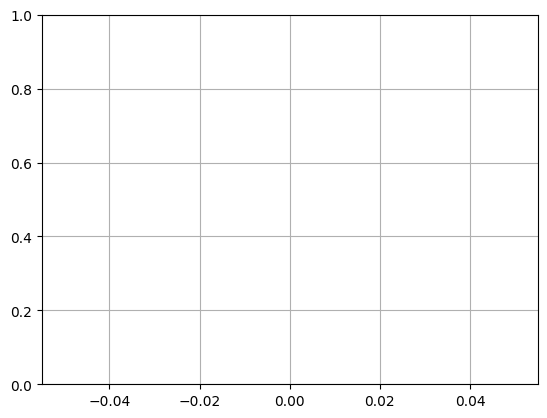

In [173]:
plt.plot(pd.DataFrame(history.history)) #Plot the loss and accuracy of the model
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [157]:
y_pred #predicted values

array([[nan],
       [nan],
       [nan]], dtype=float32)

In [175]:
input_ = keras.layers.Input(shape=X_train.shape[1:]) # input layer
hidden1 = keras.layers.Dense(100, activation="relu")(input_) # hidden layer
hidden2 = keras.layers.Dense(50, activation="relu")(hidden1) # hidden layer
concat = keras.layers.concatenate([input_, hidden2])     # concatenate input and hidden layer
output = keras.layers.Dense(1)(concat)                  # output layer
model = keras.models.Model(inputs=[input_], outputs=[output]) # define model architecture

In [176]:
model.summary() # summary of the model

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 9)]          0           []                               
                                                                                                  
 dense_22 (Dense)               (None, 100)          1000        ['input_3[0][0]']                
                                                                                                  
 dense_23 (Dense)               (None, 50)           5050        ['dense_22[0][0]']               
                                                                                                  
 concatenate_2 (Concatenate)    (None, 59)           0           ['input_3[0][0]',                
                                                                  'dense_23[0][0]']         

In [177]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-8)) # compile the model using mean squared error as the loss function and stochastic gradient descent as the optimiser
history = model.fit(X_train, y_train, epochs=10, # fit the model to the training data over 10 epochs
                    validation_data=(X_valid, y_valid)) # validate the model on the validation data
mse_test = model.evaluate(X_test, y_test) # evaluate the model on the test data
y_pred = model.predict(X_new) # predict the output for the new data

Epoch 1/10
14/14 [==============================] - 1s 23ms/step - loss: nan - val_loss: nan
Epoch 2/10
14/14 [==============================] - 0s 8ms/step - loss: nan - val_loss: nan
Epoch 3/10
14/14 [==============================] - 0s 11ms/step - loss: nan - val_loss: nan
Epoch 4/10
14/14 [==============================] - 0s 9ms/step - loss: nan - val_loss: nan
Epoch 5/10
14/14 [==============================] - 0s 9ms/step - loss: nan - val_loss: nan
Epoch 6/10
14/14 [==============================] - 0s 9ms/step - loss: nan - val_loss: nan
Epoch 7/10
14/14 [==============================] - 0s 11ms/step - loss: nan - val_loss: nan
Epoch 8/10
14/14 [==============================] - 0s 9ms/step - loss: nan - val_loss: nan
Epoch 9/10
14/14 [==============================] - 0s 10ms/step - loss: nan - val_loss: nan
Epoch 10/10
1/1 [==============================] - 0s 105ms/step


<h2><b><u>Conclusion</u></b></h2>

In this notebook, we have seen how to use the scikit-learn library to implement the following regression algorithms: linear regression, polynomial regression, ridge regression, and neural network regression. We have used the scikit-learn library to evaluate the performance of the regression algorithms using the mean squared error and the coefficient of determination. We have also seen how to use the scikit-learn library to visualise the performance of the regression algorithms using different graphs. Based on my experience, I would recommend using the Polynomial Regression if you have a large dataset. I would've been more inclined to believe that Neural would be more beneficial as it eill be able to make predictions based on the outcome of the data. Unfortunately, I wasn't able to get it to work as I couldn't figure out the learning speed - resulting in the table displaying NaaN. ridge regression algorithm would be beneficial too, if you have a large dataset and think that only a subset of the input variables are actually useful.


<h2><b><u>References:</u></b></h2>

https://builtin.com/machine-learning/how-to-preprocess-data-python

https://www.kaggle.com/abhishekkrg/python-ml-regression-analysis

Hands-On Machine Learning with Scikit-Learn and TensorFlow - Aurelin Geron

https://scikit-learn.org/stable/modules/neural_networks_supervised.html

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

https://www.tutorialspoint.com/scikit_learn/scikit_learn_ridge_regression.htm

https://www.tutorialspoint.com/scikit_learn/scikit_learn_polynomial_regression.htm

http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

https://pypi.org/project/scikit-neuralnetwork/






